In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from highlight_text import HighlightText, ax_text, fig_text

# you can also use the financial-times theme that themepy provides
# import themepy
# theme = themepy.Theme('financial-times-light')

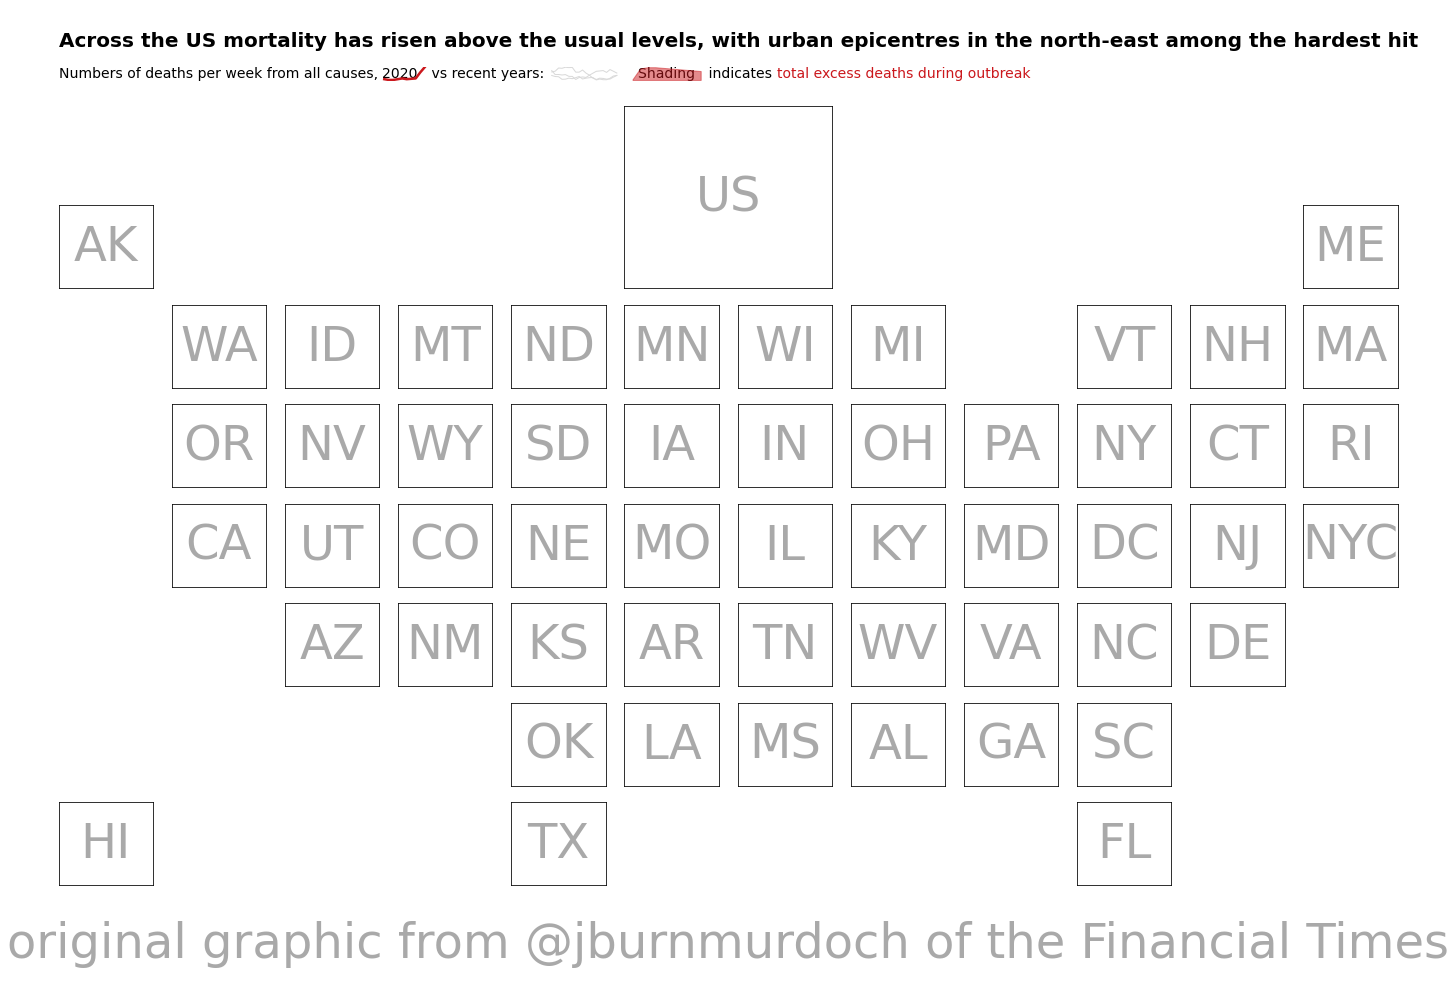

In [2]:
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.
    Draws the label in a large font in the center of the Axes.
    
    SOURCE: https://matplotlib.org/stable/tutorials/provisional/mosaic.html

    Parameters
    ----------
    ax_dict : Dict[str, Axes]
        Mapping between the title / label and the Axes.

    fontsize : int, optional
        How big the label should be
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)


# Here we use matplotlibs new subplot_mosaic feature to create a complex layout
ft_layout = [12*['title'],
              [0, 0, 0, 0, 0, 'US', 'US', 0, 0, 0, 0, 0],
              ['AK', 0, 0, 0, 0, 'US', 'US', 0, 0, 0, 0, 'ME'],
              [0, 'WA', 'ID', 'MT', 'ND', 'MN', 'WI', 'MI', 0, 'VT', 'NH', 'MA'],
              [0, 'OR', 'NV', 'WY', 'SD', 'IA', 'IN', 'OH', 'PA', 'NY', 'CT', 'RI'],
              [0, 'CA', 'UT', 'CO', 'NE', 'MO', 'IL', 'KY', 'MD', 'DC', 'NJ', 'NYC'],
              [0, 0, 'AZ', 'NM', 'KS', 'AR', 'TN', 'WV', 'VA', 'NC', 'DE', 0],
              [0, 0, 0, 0, 'OK', 'LA', 'MS', 'AL', 'GA', 'SC', 0, 0],
              ['HI', 0, 0, 0, 'TX', 0, 0, 0, 0, 'FL', 0, 0],
              12*['original graphic from @jburnmurdoch of the Financial Times']]

# 0 defines empty spaces, subplot_mosaic takes in an "empty_sentinel" parameter
fig, axd = plt.subplot_mosaic(ft_layout,
                              constrained_layout=False,
                              empty_sentinel=0,
                              figsize=(24, 18))

plt.sca(axd['title'])

title=\
ax_text(s='<Across the US mortality has risen above the usual levels, with urban epicentres in the north-east among the hardest hit>\n\n'
          'Numbers of deaths per week from all causes, <2020  > vs recent years: <sparklines>  <  Shading  > indicates <total excess deaths during outbreak>',
        x=0,
        y=0.4,
        va='center',
        highlight_textprops=[{"size": 20, "weight": "bold"},
                             {"color": "k"},
                             {"alpha": 0},
                             {"color": "k"},
                             {"color": "#cb181d"}],
        vsep=8,
        ax=axd['title'],
        fontsize = 14
       );

axd['title'].axis('off');
axd['original graphic from @jburnmurdoch of the Financial Times'].axis('off');
ax_title = axd.pop('title')
identify_axes(axd)

# 
for ax in axd.values():
    ax.tick_params(axis='both', colors='None')

# Recreating @jburnmurdoch's plot, we specify for which of the text highlights
# we want to create an axes inset on top of the highlighted TextAreas
# Here we do that for the 2nd <2020>, 3rd <sparklines> and 4th <Shading> text highlights

# the HighlightText class offers a function to create axes on top of the bboxes of the highlights
title.make_highlight_insets([False, True, True, True, False])
# returns a list of [None (for False), and Axes objects (for True)]

# and are stored in `.highlight_axes`
insets = title.highlight_axes

# plot onto the inset axes
# insets[0] and insets[4] hold None for no inset

insets[1].plot(np.arange(0, 1, 0.1),
                   [0.05, 0, 0, 0.05, 0.1, 0.05, 0.075, 0.1, 0.5, 0.85],
                   color='#cb181d', lw=2.5)

insets[2].plot(np.random.normal(loc=0, scale=0.5, size=(20, 3)).cumsum(axis=0), color='#d9d9d9', lw=1)

insets[3].fill_between(np.arange(0, 1, 0.1),
                                     [0.05, 0.9, 1, 1, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7],
                                     color='#cb181d', alpha = 0.5)

plt.show()

#fig.savefig('../examples/example_financial-times_jburnmurdoch.png', dpi=200, bbox_inches='tight')